# Kaggle Turkish User Statistics

# Import Libraries

In [1]:
import numpy as np  # Import the NumPy library and alias it as 'np'
import pandas as pd  # Import the Pandas library and alias it as 'pd'
import matplotlib.pyplot as plt # Import the matpltolib.pyplot and alias it as 'plt'
import seaborn as sns # Import the Seaborn library and alias it as 'sns'

# Mappings

In [2]:
# Define a mapping for numerical rankings to corresponding levels or titles
RANKINGS_MAPPING = {
    0: 'NOVICE',          # Level 0 corresponds to 'NOVICE'
    1: 'CONTRIBUTOR',     # Level 1 corresponds to 'CONTRIBUTOR'
    2: 'EXPERT',          # Level 2 corresponds to 'EXPERT'
    3: 'MASTER',          # Level 3 corresponds to 'MASTER'
    4: 'GRANDMASTER',     # Level 4 corresponds to 'GRANDMASTER'
    5: 'KAGGLESTAFF'      # Level 5 corresponds to 'KAGGLESTAFF'
}

In [3]:
# Create a mapping for Turkish character corrections
turkish_char_mapping = {
    'Aydin': 'Aydın',
    'Balikesir': 'Balıkesir',
    'Diyarbakir': 'Diyarbakır',
    'Elazig': 'Elazığ',
    'Eskisehir': 'Eskişehir',
    'Igdir': 'Iğdır',
    'Istanbul': 'İstanbul',
    'Izmir': 'İzmir',
    'Kahramanmaras': 'Kahramanmaraş',
    'Kirklareli': 'Kırklareli',
    'Kirsehir': 'Kırşehir',
    'Mugla': 'Muğla',
    'Nevsehir': 'Nevşehir',
    'Sanliurfa': 'Şanlıurfa',
    'Tekirdag': 'Tekirdağ',
    'Usak': 'Uşak'
}

# Read Datasets

In [4]:
# Read the user country and region mapping data
df_countries = pd.read_csv("/kaggle/input/kaggle-user-country-regions/UserCountries.csv")

# Read the Kaggle users' information
df_users = pd.read_csv("/kaggle/input/meta-kaggle/Users.csv")

# Read a mapping of Turkish cities to regions
df_turkiye_mapping = pd.read_excel("/kaggle/input/turkiye-sehirler-bolgeler/Trkiye_ehirler_Blgeler.xlsx", sheet_name="Sheet1")

# Data Preprocessing

In [5]:
# Map the numerical PerformanceTier values in the df_users DataFrame to their corresponding titles using RANKINGS_MAPPING
df_users["PerformanceTier"] = df_users["PerformanceTier"].map(RANKINGS_MAPPING)

# Replace the country name 'Turkey' with its Turkish equivalent 'Türkiye' in the df_countries DataFrame
df_countries["country"] = df_countries["country"].replace("Turkey", "Türkiye")

# Create a new DataFrame df_turkiye containing rows where the country is 'Türkiye' in the df_countries DataFrame
df_turkiye = df_countries[df_countries["country"] == "Türkiye"]

## Fix Turkiye's Region Values

In [6]:
# Extract unique regions from the 'region' column in the df_turkiye DataFrame
unique_regions = df_turkiye["region"].unique()

# Sort the unique regions in a case-insensitive manner and store the result in sorted_unique_regions
sorted_unique_regions = sorted(unique_regions, key=lambda x: str(x).lower())

# Print the sorted unique regions
print(sorted_unique_regions)

['Adana', 'Adıyaman', 'Afyonkarahisar', 'Aksaray', 'Amasya', 'Ankara', 'Antalya', 'Ardahan', 'Artvin', 'Aydin', 'Aydın', 'Ağrı', 'Balikesir', 'Balıkesir', 'Bartın', 'Batman', 'Bayburt', 'Bilecik', 'Bingöl', 'Bitlis', 'Bolu', 'Burdur', 'Bursa', 'Denizli', 'Diyarbakir', 'Diyarbakır', 'Düzce', 'Edirne', 'Elazig', 'Elazığ', 'Erzincan', 'Erzurum', 'Eskisehir', 'Eskişehir', 'Gaziantep', 'Giresun', 'Hakkari', 'Hatay', 'Igdir', 'Isparta', 'Istanbul', 'Izmir', 'Iğdır', 'İstanbul', 'İzmir', 'Kahramanmaras', 'Kahramanmaraş', 'Karabük', 'Karaman', 'Kars', 'Kastamonu', 'Kayseri', 'Kilis', 'Kirklareli', 'Kirsehir', 'Kocaeli', 'Konya', 'Kütahya', 'Kırklareli', 'Kırıkkale', 'Kırşehir', 'Malatya', 'Manisa', 'Mardin', 'Mersin', 'Mugla', 'Muğla', nan, 'Nevsehir', 'Niğde', 'Ordu', 'Osmaniye', 'Rize', 'Sakarya', 'Samsun', 'Sanliurfa', 'Siirt', 'Sinop', 'Sivas', 'Tekirdag', 'Tekirdağ', 'Tokat', 'Trabzon', 'Tunceli', 'Usak', 'Uşak', 'Van', 'Yalova', 'Yozgat', 'Zonguldak', 'Çanakkale', 'Çorum', 'Şanlıurfa', '

In [7]:
# Apply the mapping to update values in the 'region' column
df_turkiye['region'] = df_turkiye['region'].replace(turkish_char_mapping)

# Rename the 'region' column in the df_turkiye DataFrame to 'city'
df_turkiye.rename(columns={'region': 'city'}, inplace=True)

df_turkiye = df_turkiye.reset_index(drop=True)

df_turkiye.head()

/tmp/ipykernel_19/2054511346.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_turkiye['region'] = df_turkiye['region'].replace(turkish_char_mapping)
/tmp/ipykernel_19/2054511346.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_turkiye.rename(columns={'region': 'city'}, inplace=True)


,userId,country,city
0,10010,Türkiye,İstanbul
1,23721,Türkiye,İstanbul
2,35110,Türkiye,İstanbul
3,38205,Türkiye,İstanbul
4,49050,Türkiye,İstanbul


In [8]:
# Merge the df_turkiye DataFrame with df_turkiye_mapping on the 'city' and 'sehir' columns
df_turkiye = df_turkiye.merge(df_turkiye_mapping[['sehir', 'bolge']], how='left', left_on='city', right_on='sehir')

# Drop the redundant 'sehir' column after the merge
df_turkiye.drop(['sehir'], axis=1, inplace=True)

# Rename the 'bolge' column in the df_turkiye DataFrame to 'region'
df_turkiye.rename(columns={'bolge': 'region'}, inplace=True)

## Merge Dfs

In [9]:
# Merge the df_turkiye DataFrame with selected columns from the df_users DataFrame
df_turkiye = df_turkiye.merge(df_users[['Id', 'UserName', 'RegisterDate', 'PerformanceTier']], how='left', left_on='userId', right_on='Id')

# Drop the redundant 'Id' column after the merge
df_turkiye.drop(['Id'], axis=1, inplace=True)

df_turkiye.head()

,userId,country,city,region,UserName,RegisterDate,PerformanceTier
0,10010,Türkiye,İstanbul,Marmara Bölgesi,eax10010,04/20/2011,NOVICE
1,23721,Türkiye,İstanbul,Marmara Bölgesi,alpkindiroglu,11/17/2011,NOVICE
2,35110,Türkiye,İstanbul,Marmara Bölgesi,masoudsaeed,03/12/2012,CONTRIBUTOR
3,38205,Türkiye,İstanbul,Marmara Bölgesi,aydinhan,04/07/2012,CONTRIBUTOR
4,49050,Türkiye,İstanbul,Marmara Bölgesi,celiksemih,07/05/2012,CONTRIBUTOR


## Create New Features

In [10]:
# Convert the 'RegisterDate' column to datetime format
df_turkiye['RegisterDate'] = pd.to_datetime(df_turkiye['RegisterDate'], format='%m/%d/%Y')

# Creating new features
df_turkiye['Day'] = df_turkiye['RegisterDate'].dt.day
df_turkiye['Month'] = df_turkiye['RegisterDate'].dt.month
df_turkiye['Season'] = (df_turkiye['RegisterDate'].dt.month % 12 + 3) // 3  # Calculating the season (1: Winter, 2: Spring, 3: Winter, 4: Fall)
df_turkiye['Year'] = df_turkiye['RegisterDate'].dt.year
df_turkiye['Weekday'] = df_turkiye['RegisterDate'].dt.dayofweek  # Weekday (0: Monday, 1: Tuesday, ..., 6: Sunday)
df_turkiye['Weekend'] = df_turkiye['RegisterDate'].dt.weekday // 5  # Weekend check (1: Weekend, 0: Weekday)

df_turkiye.head()

,userId,country,city,region,UserName,RegisterDate,PerformanceTier,Day,Month,Season,Year,Weekday,Weekend
0,10010,Türkiye,İstanbul,Marmara Bölgesi,eax10010,2011-04-20,NOVICE,20.0,4.0,2.0,2011.0,2.0,0.0
1,23721,Türkiye,İstanbul,Marmara Bölgesi,alpkindiroglu,2011-11-17,NOVICE,17.0,11.0,4.0,2011.0,3.0,0.0
2,35110,Türkiye,İstanbul,Marmara Bölgesi,masoudsaeed,2012-03-12,CONTRIBUTOR,12.0,3.0,2.0,2012.0,0.0,0.0
3,38205,Türkiye,İstanbul,Marmara Bölgesi,aydinhan,2012-04-07,CONTRIBUTOR,7.0,4.0,2.0,2012.0,5.0,1.0
4,49050,Türkiye,İstanbul,Marmara Bölgesi,celiksemih,2012-07-05,CONTRIBUTOR,5.0,7.0,3.0,2012.0,3.0,0.0


In [11]:
# Set the analysis date
analysis_date = pd.to_datetime('01 Jan 2024', format='%d %b %Y')

analysis_year = analysis_date.year

# Calculate tenure on a yearly basis
df_turkiye['Tenure'] = analysis_year - df_turkiye['Year']

df_turkiye

,userId,country,city,region,UserName,RegisterDate,PerformanceTier,Day,Month,Season,Year,Weekday,Weekend,Tenure
0,10010,Türkiye,İstanbul,Marmara Bölgesi,eax10010,2011-04-20,NOVICE,20.0,4.0,2.0,2011.0,2.0,0.0,13.0
1,23721,Türkiye,İstanbul,Marmara Bölgesi,alpkindiroglu,2011-11-17,NOVICE,17.0,11.0,4.0,2011.0,3.0,0.0,13.0
2,35110,Türkiye,İstanbul,Marmara Bölgesi,masoudsaeed,2012-03-12,CONTRIBUTOR,12.0,3.0,2.0,2012.0,0.0,0.0,12.0
3,38205,Türkiye,İstanbul,Marmara Bölgesi,aydinhan,2012-04-07,CONTRIBUTOR,7.0,4.0,2.0,2012.0,5.0,1.0,12.0
4,49050,Türkiye,İstanbul,Marmara Bölgesi,celiksemih,2012-07-05,CONTRIBUTOR,5.0,7.0,3.0,2012.0,3.0,0.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7083,18275672,Türkiye,Balıkesir,Marmara Bölgesi,firatgurler,2023-12-18,NOVICE,18.0,12.0,1.0,2023.0,0.0,0.0,1.0
7084,18320124,Türkiye,İstanbul,Marmara Bölgesi,muratkeskinn,2023-12-21,NOVICE,21.0,12.0,1.0,2023.0,3.0,0.0,1.0
7085,18345155,Türkiye,Sakarya,Marmara Bölgesi,zehrakeles1,2023-12-24,NOVICE,24.0,12.0,1.0,2023.0,6.0,1.0,1.0
7086,18363562,Türkiye,İstanbul,Marmara Bölgesi,tarikemre,2023-12-26,CONTRIBUTOR,26.0,12.0,1.0,2023.0,1.0,0.0,1.0


## Missing Values

In [12]:
df_turkiye.isnull().sum()

userId               0
country              0
city               212
region             212
UserName            24
RegisterDate        24
PerformanceTier     24
Day                 24
Month               24
Season              24
Year                24
Weekday             24
Weekend             24
Tenure              24
dtype: int64

In [13]:
# Fill NaN values in 'city' and 'region' with the most frequent values
df_turkiye['city'].fillna(df_turkiye['city'].mode().iloc[0], inplace=True)
df_turkiye['region'].fillna(df_turkiye['region'].mode().iloc[0], inplace=True)

# Remove rows with missing values in other columns
df_turkiye.dropna(inplace=True)

# Reset the index
df_turkiye.reset_index(drop=True, inplace=True)

In [14]:
# Convert the columns to integers
df_turkiye['Day'] = df_turkiye['Day'].astype(int)
df_turkiye['Month'] = df_turkiye['Month'].astype(int)
df_turkiye['Season'] = df_turkiye['Season'].astype(int)
df_turkiye['Year'] = df_turkiye['Year'].astype(int)
df_turkiye['Weekday'] = df_turkiye['Weekday'].astype(int)
df_turkiye['Weekend'] = df_turkiye['Weekend'].astype(int)

In [15]:
df_turkiye.head()

,userId,country,city,region,UserName,RegisterDate,PerformanceTier,Day,Month,Season,Year,Weekday,Weekend,Tenure
0,10010,Türkiye,İstanbul,Marmara Bölgesi,eax10010,2011-04-20,NOVICE,20,4,2,2011,2,0,13.0
1,23721,Türkiye,İstanbul,Marmara Bölgesi,alpkindiroglu,2011-11-17,NOVICE,17,11,4,2011,3,0,13.0
2,35110,Türkiye,İstanbul,Marmara Bölgesi,masoudsaeed,2012-03-12,CONTRIBUTOR,12,3,2,2012,0,0,12.0
3,38205,Türkiye,İstanbul,Marmara Bölgesi,aydinhan,2012-04-07,CONTRIBUTOR,7,4,2,2012,5,1,12.0
4,49050,Türkiye,İstanbul,Marmara Bölgesi,celiksemih,2012-07-05,CONTRIBUTOR,5,7,3,2012,3,0,12.0


In [16]:
df_turkiye.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7064 entries, 0 to 7063
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   userId           7064 non-null   int64         
 1   country          7064 non-null   object        
 2   city             7064 non-null   object        
 3   region           7064 non-null   object        
 4   UserName         7064 non-null   object        
 5   RegisterDate     7064 non-null   datetime64[ns]
 6   PerformanceTier  7064 non-null   object        
 7   Day              7064 non-null   int64         
 8   Month            7064 non-null   int64         
 9   Season           7064 non-null   int64         
 10  Year             7064 non-null   int64         
 11  Weekday          7064 non-null   int64         
 12  Weekend          7064 non-null   int64         
 13  Tenure           7064 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(

# Exploratory Data Analysis

## Share of Turkiye in the World

In [17]:
# Calculate the total number of members worldwide
total_members = df_countries.shape[0]

# Calculate the number of members from Turkey
turkiye_members = df_turkiye.shape[0]

# Print the total and Turkey-specific membership information
print(f'Total members: {total_members}')
print(f"Turkey's members: {turkiye_members}")

# Calculate and print the share of Turkey in the total membership
turkiye_share = turkiye_members / total_members
print('Share of Turkey in the World:', turkiye_share)

Total members: 311553
Turkey's members: 7064
Share of Turkey in the World: 0.022673509804110377


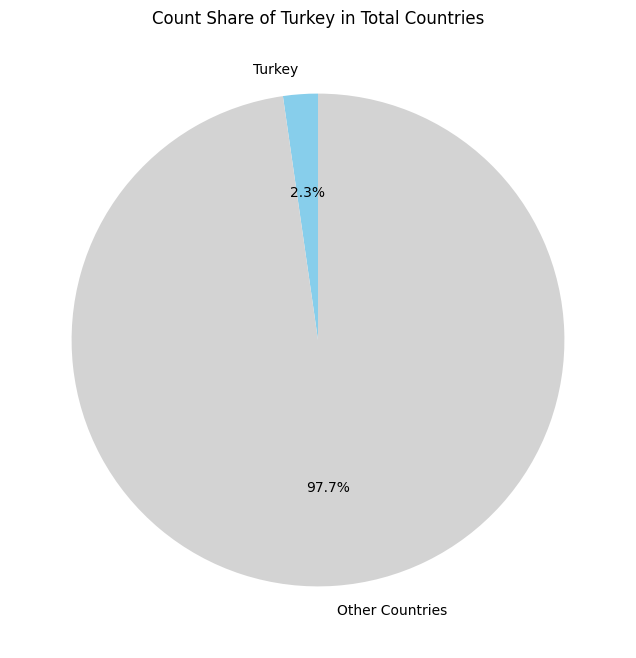

In [18]:
# Calculate the count of occurrences for Turkey
turkey_count = df_countries[df_countries['country'] == 'Türkiye'].shape[0]

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie([turkey_count, len(df_countries) - turkey_count], labels=['Turkey', 'Other Countries'], autopct='%1.1f%%', colors=['skyblue', 'lightgray'], startangle=90)
plt.title('Count Share of Turkey in Total Countries')

# Show the plot
plt.show()

## Top 7 Countries

Text(0, 0.5, '')

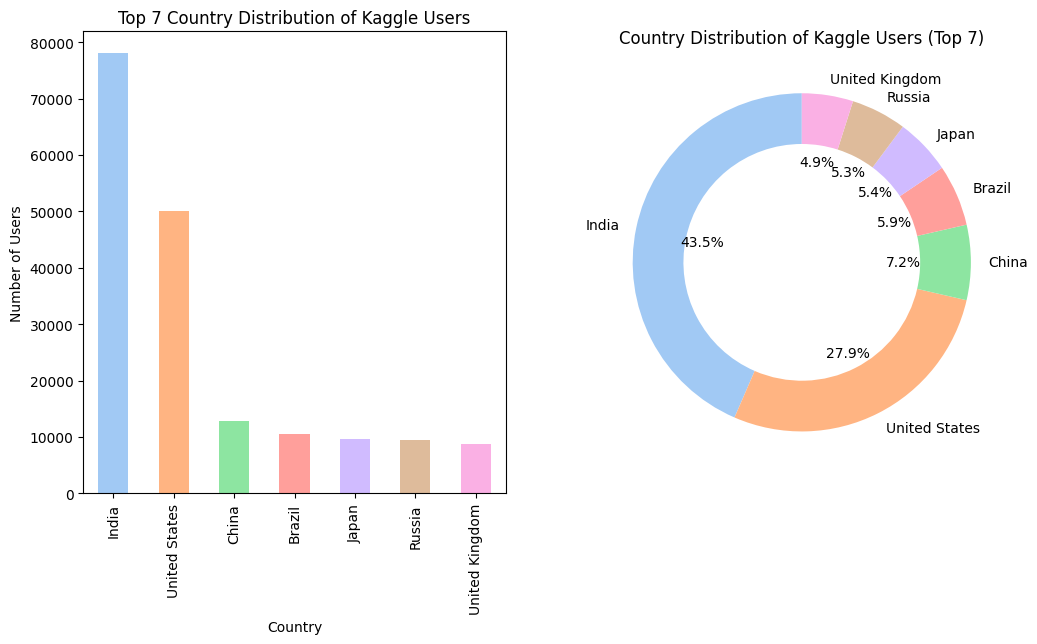

In [19]:
# Country Distribution
plt.figure(figsize=(12, 6))

# Left Table for Country Distribution
plt.subplot(1, 2, 1)
country_distribution_table = df_countries['country'].value_counts().head(7)
country_distribution_table.plot(kind='bar', color=sns.color_palette("pastel"))
plt.title('Top 7 Country Distribution of Kaggle Users')
plt.xlabel('Country')
plt.ylabel('Number of Users')

# Right - Pie Chart for Country Distribution
plt.subplot(1, 2, 2)
country_distribution_pie = df_countries['country'].value_counts().head(7)
country_distribution_pie.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"), wedgeprops=dict(width=0.3))
plt.title('Country Distribution of Kaggle Users (Top 7)')
plt.ylabel('')

## Top 7 Cities and Regions with the Most Members

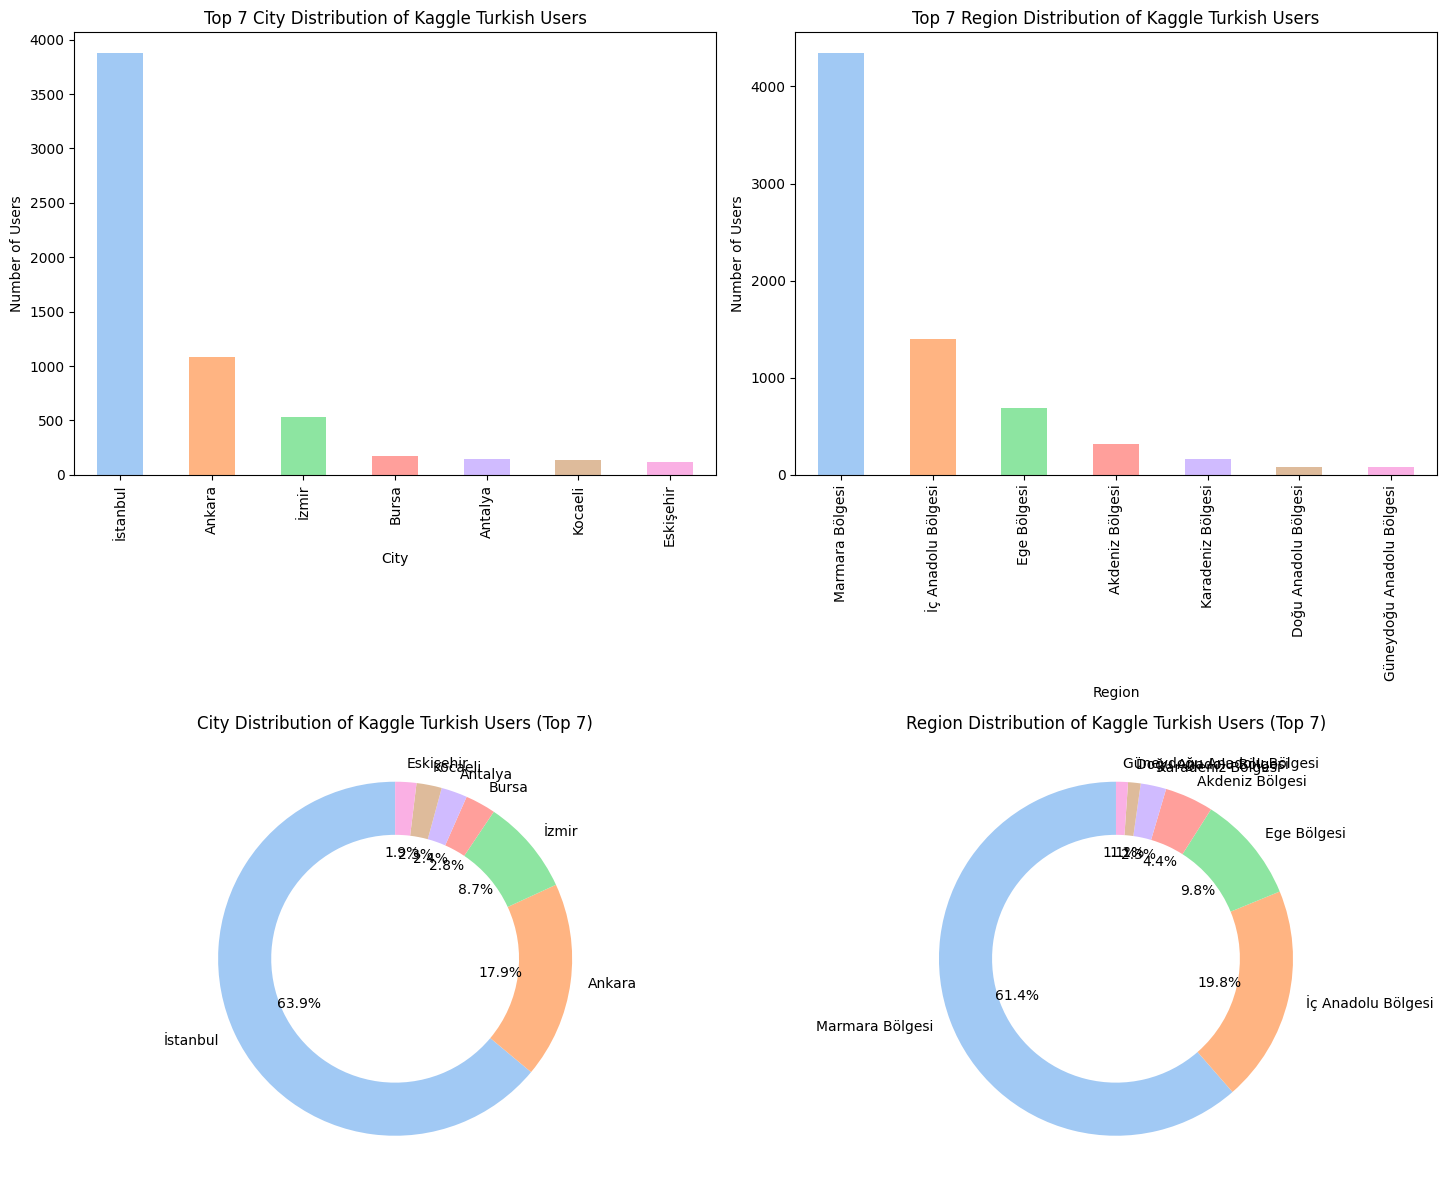

In [20]:
# City Distribution
plt.figure(figsize=(15, 12))

# Upper Left - Table for City Distribution
plt.subplot(2, 2, 1)
city_distribution_table = df_turkiye['city'].value_counts().head(7)
city_distribution_table.plot(kind='bar', color=sns.color_palette("pastel"))
plt.title('Top 7 City Distribution of Kaggle Turkish Users')
plt.xlabel('City')
plt.ylabel('Number of Users')

# Upper Right - Table for Region Distribution
plt.subplot(2, 2, 2)
region_distribution_table = df_turkiye['region'].value_counts().head(7)
region_distribution_table.plot(kind='bar', color=sns.color_palette("pastel"))
plt.title('Top 7 Region Distribution of Kaggle Turkish Users')
plt.xlabel('Region')
plt.ylabel('Number of Users')

# Lower Left - Pie Chart for City Distribution
plt.subplot(2, 2, 3)
city_distribution_pie = df_turkiye['city'].value_counts().head(7)
city_distribution_pie.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"), wedgeprops=dict(width=0.3))
plt.title('City Distribution of Kaggle Turkish Users (Top 7)')
plt.ylabel('')

# Lower Right - Pie Chart for Region Distribution
plt.subplot(2, 2, 4)
region_distribution_pie = df_turkiye['region'].value_counts().head(7)
region_distribution_pie.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"), wedgeprops=dict(width=0.3))
plt.title('Region Distribution of Kaggle Turkish Users (Top 7)')
plt.ylabel('')

# Adjusting layout to prevent overlap
plt.tight_layout()
plt.show()

## Distribution of Time-related Variables in Turkiye

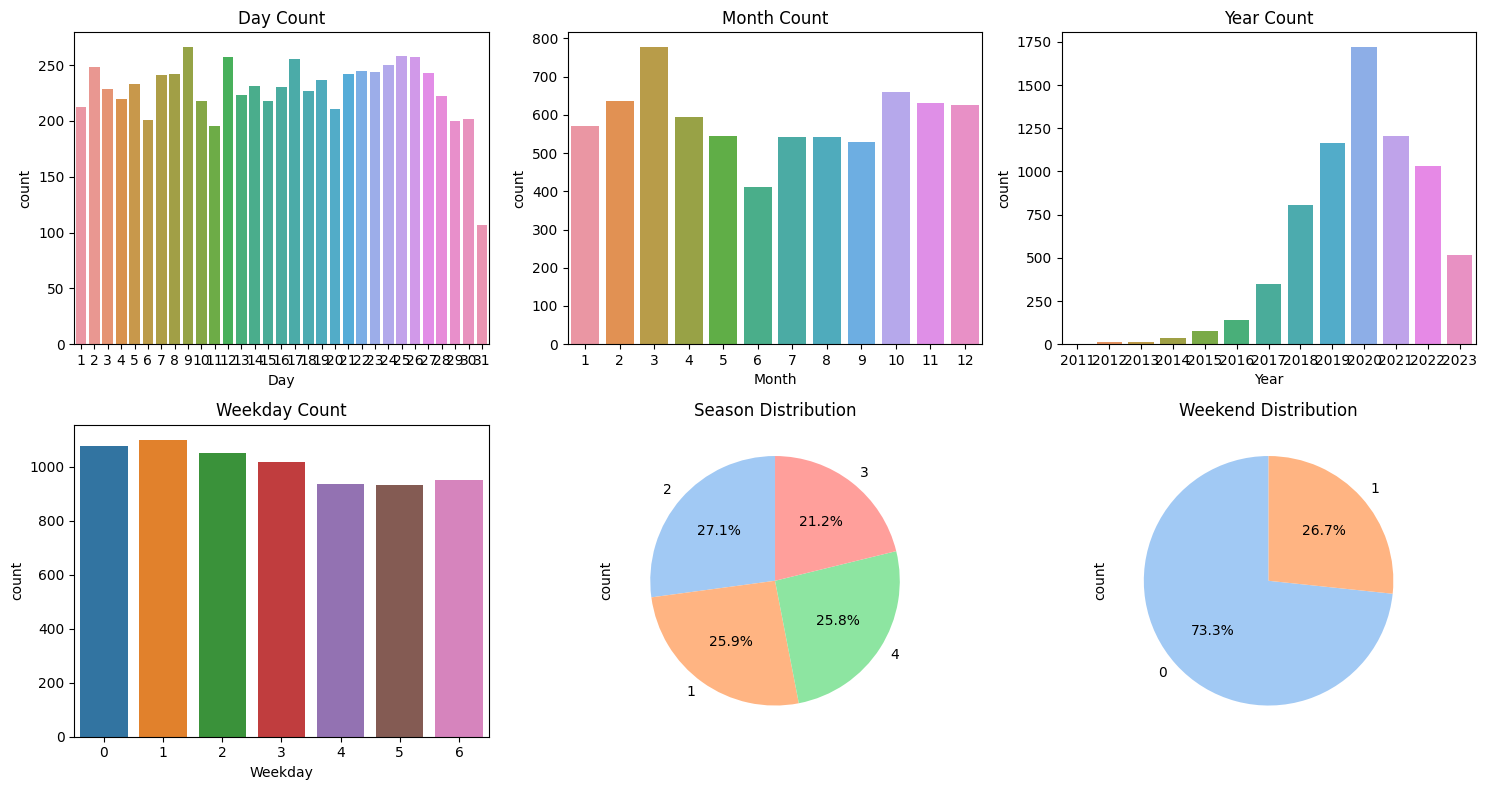

In [21]:
# Create a 2x3 grid of subplots
plt.figure(figsize=(15, 8))

# Plot for 'Day' column
plt.subplot(2, 3, 1)
sns.countplot(data=df_turkiye, x='Day')
plt.title('Day Count')

# Plot for 'Month' column
plt.subplot(2, 3, 2)
sns.countplot(data=df_turkiye, x='Month')
plt.title('Month Count')

# Plot for 'Year' column
plt.subplot(2, 3, 3)
sns.countplot(data=df_turkiye, x='Year')
plt.title('Year Count')

# Plot for 'Weekday' column
plt.subplot(2, 3, 4)
sns.countplot(data=df_turkiye, x='Weekday')
plt.title('Weekday Count')

# Pie chart for 'Season' column
plt.subplot(2, 3, 5)
df_turkiye['Season'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title('Season Distribution')

# Pie chart for 'Weekend' column
plt.subplot(2, 3, 6)
df_turkiye['Weekend'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title('Weekend Distribution')

# Adjusting layout to prevent overlap
plt.tight_layout()
plt.show()

## Yearly and Cumulative Counts in Turkey

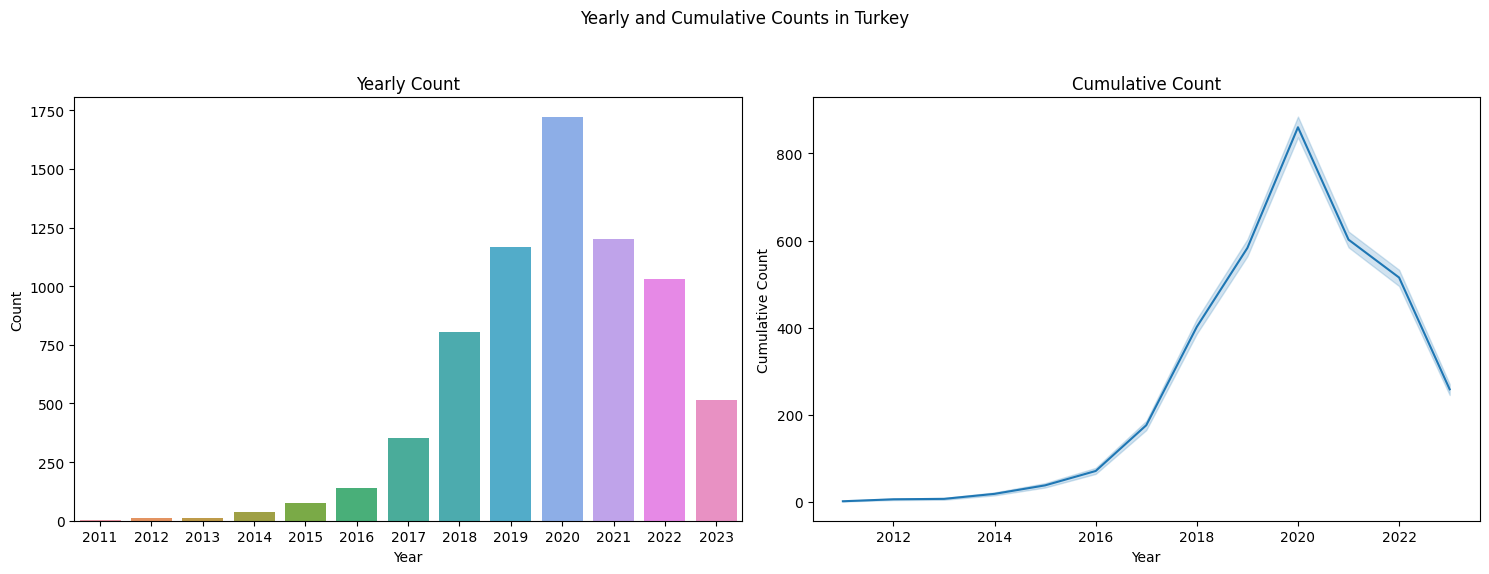

In [22]:
# Create a 1x2 grid of subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Add a general title to the entire plot
plt.suptitle('Yearly and Cumulative Counts in Turkey')

# Plot for 'Yearly Count' (column graph)
sns.countplot(data=df_turkiye, x='Year', ax=axes[0])
axes[0].set_title('Yearly Count')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Count')

# Plot for 'Cumulative Count' (line graph)
df_turkiye['Yearly Cumulative'] = df_turkiye.groupby('Year').cumcount() + 1
sns.lineplot(data=df_turkiye, x='Year', y='Yearly Cumulative', ax=axes[1])
axes[1].set_title('Cumulative Count')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Cumulative Count')

# Adjusting layout to prevent overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Performance Tier Distribution in Turkey

In [23]:
df_turkiye.groupby("PerformanceTier").agg({"userId": "count"}).sort_values(by='userId', ascending=False)

,userId
PerformanceTier,
NOVICE,4297
CONTRIBUTOR,2378
EXPERT,352
MASTER,29
GRANDMASTER,8


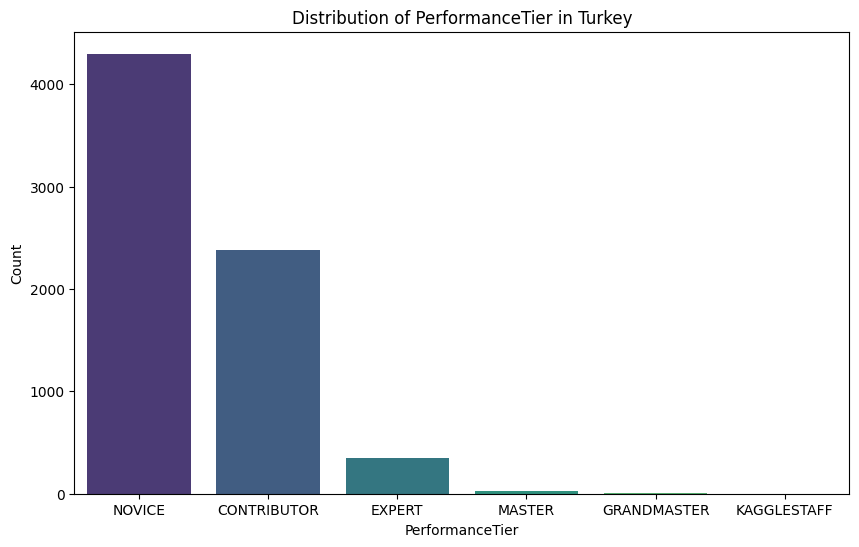

In [24]:
# Create a bar chart for 'PerformanceTier'
plt.figure(figsize=(10, 6))
sns.countplot(data=df_turkiye, x='PerformanceTier', order=['NOVICE', 'CONTRIBUTOR', 'EXPERT', 'MASTER', 'GRANDMASTER', 'KAGGLESTAFF'], palette='viridis')
plt.title('Distribution of PerformanceTier in Turkey')
plt.xlabel('PerformanceTier')
plt.ylabel('Count')

# Show the plot
plt.show()

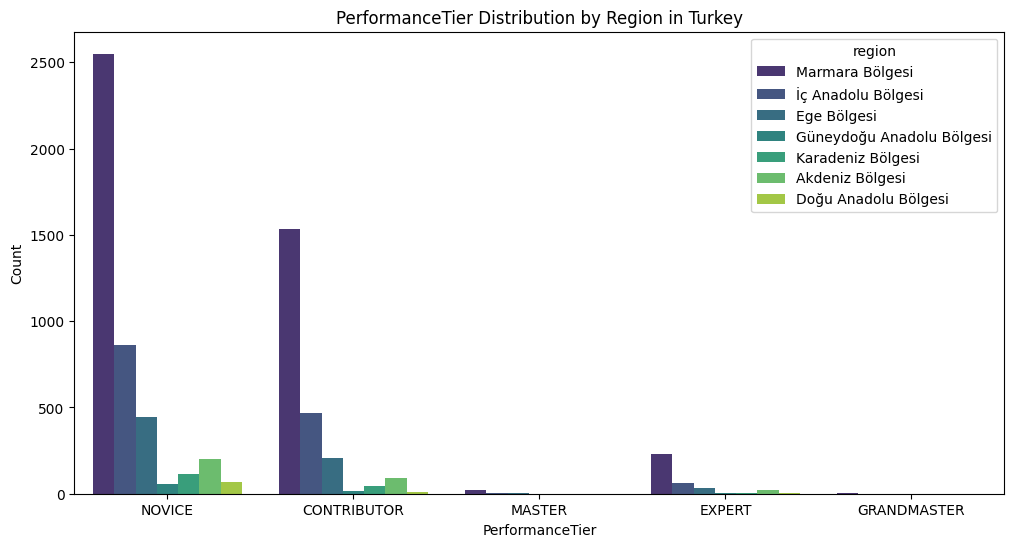

In [25]:
# Create a bar plot for PerformanceTier x Region
plt.figure(figsize=(12, 6))
sns.countplot(data=df_turkiye, x='PerformanceTier', hue='region', palette='viridis')
plt.title('PerformanceTier Distribution by Region in Turkey')
plt.xlabel('PerformanceTier')
plt.ylabel('Count')
plt.show()

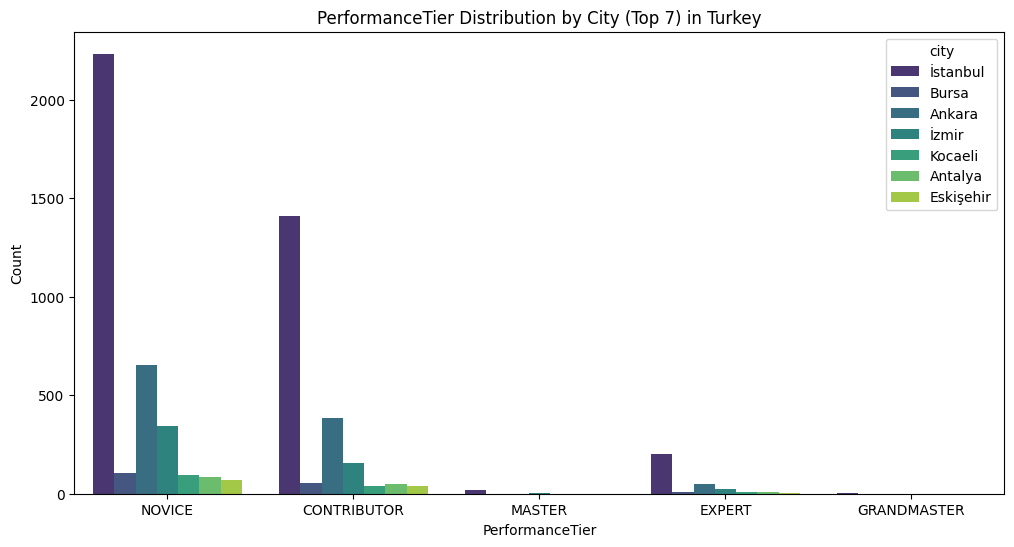

In [26]:
# Determine the top 7 cities based on their count
top7_cities = df_turkiye['city'].value_counts().head(7).index

# Filter the DataFrame for the top 7 cities
df_top7_cities = df_turkiye[df_turkiye['city'].isin(top7_cities)]

# Create a bar plot for PerformanceTier x City (Top 7)
plt.figure(figsize=(12, 6))
sns.countplot(data=df_top7_cities, x='PerformanceTier', hue='city', palette='viridis')
plt.title('PerformanceTier Distribution by City (Top 7) in Turkey')
plt.xlabel('PerformanceTier')
plt.ylabel('Count')
plt.show()

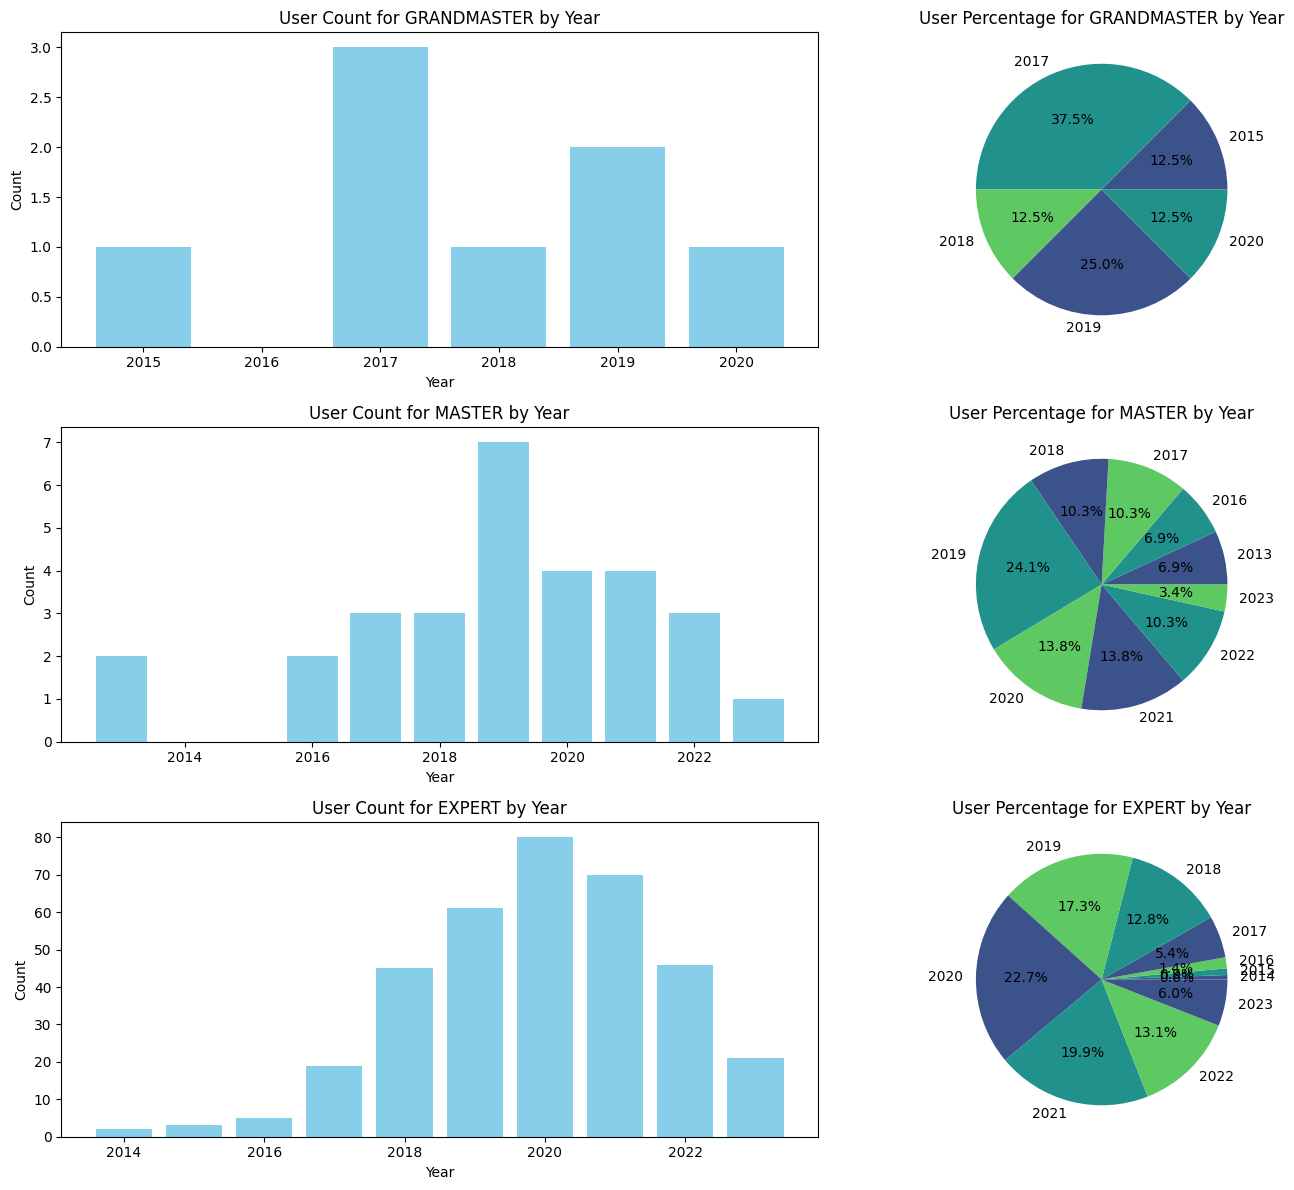

In [27]:
# Define the performance tiers of interest
performance_tiers = ['GRANDMASTER', 'MASTER', 'EXPERT']

# Set a color palette for pie charts
colors = sns.color_palette('viridis', n_colors=len(performance_tiers))

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))

# Loop through each performance tier
for i, tier in enumerate(performance_tiers):
    # Filter users with the current performance tier
    filtered_users = df_turkiye[df_turkiye['PerformanceTier'] == tier]

    # Calculate the count of users for each year
    yearly_count = filtered_users['RegisterDate'].dt.year.value_counts().sort_index()

    # Calculate the percentage of users for each year
    yearly_percentage = yearly_count / yearly_count.sum() * 100

    # Plotting the count
    axes[i, 0].bar(yearly_count.index, yearly_count.values, color='skyblue')
    axes[i, 0].set_title(f'User Count for {tier} by Year')
    axes[i, 0].set_xlabel('Year')
    axes[i, 0].set_ylabel('Count')

    # Plotting the percentage as a pie chart
    axes[i, 1].pie(yearly_percentage, labels=yearly_percentage.index, autopct='%1.1f%%', colors=colors)
    axes[i, 1].set_title(f'User Percentage for {tier} by Year')

# Adjust layout
plt.tight_layout()
plt.show()

In [28]:
df_turkiye[df_turkiye["PerformanceTier"]=="GRANDMASTER"]

,userId,country,city,region,UserName,RegisterDate,PerformanceTier,Day,Month,Season,Year,Weekday,Weekend,Tenure,Yearly Cumulative
126,471945,Türkiye,İstanbul,Marmara Bölgesi,aerdem4,2015-11-22,GRANDMASTER,22,11,4,2015,6,1,9.0,65
287,864216,Türkiye,İstanbul,Marmara Bölgesi,fatihozturk,2017-01-11,GRANDMASTER,11,1,1,2017,2,0,7.0,10
386,1056223,Türkiye,İstanbul,Marmara Bölgesi,ekrembayar,2017-05-03,GRANDMASTER,3,5,2,2017,2,0,7.0,109
449,1157642,Türkiye,İstanbul,Marmara Bölgesi,kanncaa1,2017-07-06,GRANDMASTER,6,7,3,2017,3,0,7.0,172
1105,2332181,Türkiye,İstanbul,Marmara Bölgesi,frtgnn,2018-10-07,GRANDMASTER,7,10,4,2018,6,1,6.0,477
1481,2706866,Türkiye,Ankara,İç Anadolu Bölgesi,gunesevitan,2019-01-15,GRANDMASTER,15,1,1,2019,1,0,5.0,50
1964,3381067,Türkiye,Antalya,Akdeniz Bölgesi,hasanbasriakcay,2019-06-22,GRANDMASTER,22,6,3,2019,5,1,5.0,533
2909,4616296,Türkiye,İstanbul,Marmara Bölgesi,datafan07,2020-03-05,GRANDMASTER,5,3,2,2020,3,0,4.0,313


# THANK YOU FOR YOUR INTEREST!